1. How do you create a simple perceptron for basic binary classification?

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

print("Predictions:")
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"{inputs}: {prediction}")


X2 = np.array([[1, 2], [2, 1], [2, 2], [3, 3], [4, 4]])
y2 = np.array([0, 0, 1, 1, 1])

perceptron2 = Perceptron(input_size=2)
perceptron2.train(X2, y2)

print("\nPredictions for second dataset:")
for inputs in X2:
    prediction = perceptron2.predict(inputs)
    print(f"{inputs}: {prediction}")

Predictions:
[0 0]: 0
[0 1]: 0
[1 0]: 0
[1 1]: 1

Predictions for second dataset:
[1 2]: 0
[2 1]: 0
[2 2]: 1
[3 3]: 1
[4 4]: 1


2. How can you build a neural network with one hidden layer using Keras?

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=6, activation='relu', input_shape=(4,)),
    Dense(units=3, activation='softmax')
])

model.summary()

C:\Users\supri\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
from sklearn.datasets import load_iris

df = load_iris()

x = df.data
y = df.target

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x, y, epochs = 100, batch_size = 10)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0000e+00 - loss: 2.5124
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0607 - loss: 2.3337     
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2493 - loss: 2.1546 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2895 - loss: 1.9641
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3393 - loss: 1.8678
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3372 - loss: 1.7023  
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3790 - loss: 1.5228  
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3335 - loss: 1.5328
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3003 - loss: 1.5491
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2809 - loss: 1.5590
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2862 - loss: 1.4669
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

3. How do you initialize weights using the Xavier (Glorot) initialization method in Keras?

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense


model1 = keras.Sequential([
    Dense(32, activation='relu', input_shape=(4,), kernel_initializer='glorot_uniform'),
    Dense(16, activation='relu', kernel_initializer='glorot_uniform'),
    Dense(4, activation='relu', kernel_initializer='glorot_uniform'),
    Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

from tensorflow.keras.initializers import GlorotNormal
initializer = GlorotNormal()

model2 = keras.Sequential([
    Dense(32, activation='relu', input_shape=(4,), kernel_initializer=initializer),
    Dense(16, activation='relu', kernel_initializer=initializer),
    Dense(4, activation='relu', kernel_initializer=initializer),
    Dense(1, activation='sigmoid', kernel_initializer=initializer)
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\supri\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
import sklearn.datasets as d

a = d.make_classification(n_samples=1000, n_features=4, n_informative=1, n_redundant=1, n_clusters_per_class=1)

import pandas as pd

x = pd.DataFrame(a[0], columns=['col_1', 'col_2', 'col_3', 'col_4'])
y = pd.DataFrame(a[1], columns=['target'])

In [8]:
model1.fit(x, y, epochs=100, batch_size=10)

Epoch 1/100


C:\Users\supri\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5825 - loss: 0.0000e+00
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5148 - loss: 0.0000e+00
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5263 - loss: 0.0000e+00
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4996 - loss: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5111 - loss: 0.0000e+00
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4815 - loss: 0.0000e+00
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5319 - loss: 0.0000e+00
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 0.0000e+00
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5076 - loss: 0.0000e+00
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4886 - loss: 0.0000e+00
Epoch 12/

In [9]:
model2.fit(x, y, epochs=100, batch_size=10)

Epoch 1/100


C:\Users\supri\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5965 - loss: 0.0000e+00
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4829 - loss: 0.0000e+00
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4748 - loss: 0.0000e+00
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4580 - loss: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5036 - loss: 0.0000e+00
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5096 - loss: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4857 - loss: 0.0000e+00
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5247 - loss: 0.0000e+00
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4996 - loss: 0.0000e+00
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4824 - loss: 0.0000e+00
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5341 - loss: 0.0000e+00
Epoch 12/

4. How can you apply different activation functions in a neural network in Keras?

In [10]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_3 = Sequential([
    Dense(units=6, activation='relu', input_shape=(4,)),
    Dense(units=8, activation='tanh'),
    Dense(units=4, activation='softmax')
])

C:\Users\supri\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from sklearn.datasets import load_iris

df = load_iris()

x = df.data
y = df.target

In [12]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122 (488.00 B)

 Trainable params: 122 (488.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_3.fit(x, y, epochs=100, batch_size=10)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2885 - loss: 1.2663
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3469 - loss: 1.2093 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4522 - loss: 1.1502 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5983 - loss: 1.1167  
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6181 - loss: 1.0932  
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 1.0541 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 1.0359  
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 1.0107 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - loss: 0.9789 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 0.9451 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.9080 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

5. How do you add dropout to a neural network model to prevent overfitting?

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_4 = Sequential([
    Dense(units=16, activation='relu', input_shape=(13,)),
    Dropout(0.2),
    Dense(units=8, activation='tanh'),
    Dense(units=4, activation='softmax')
])

In [16]:
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396 (1.55 KB)

 Trainable params: 396 (1.55 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
from sklearn.datasets import load_wine

df = load_wine()

x = df.data 
y = df.target

In [19]:
model_4.fit(x, y, epochs=100, batch_size=10)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3310 - loss: 1.4505
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 1.5106 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3186 - loss: 1.3555 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2985 - loss: 1.3863 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3844 - loss: 1.2920 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3636 - loss: 1.2785 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3644 - loss: 1.3203  
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4115 - loss: 1.1643 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2684 - loss: 1.2923 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3394 - loss: 1.2742 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4092 - loss: 1.2241 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

6. How do you manually implement forward propagation in a simple neural network?

In [20]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def forward_propagation(inputs, weights, biases):
    activations = [inputs]

    for i in range(len(weights)): 
        next_layer_activations = []
        for j in range(len(weights[i][0])):  
            weighted_sum = 0
           
            for k in range(len(activations[i])): 
                
                weighted_sum += activations[i][k] * weights[i][k][j]
            weighted_sum += biases[i][j]
            activation = sigmoid(weighted_sum)
            next_layer_activations.append(activation)
        activations.append(next_layer_activations)

    return activations[-1]  


inputs = [0.5, 0.3]
weights = [
    [[0.2, -0.3], [0.4, 0.1]], 
    [[0.5], [-0.2]]           
]
biases = [[-0.1, 0.2], [0.3]]   


output = forward_propagation(inputs, weights, biases)
print(f"Output: {output}")



weights_multi_output = [
    [[0.2, -0.3], [0.4, 0.1]],  
    [[0.5,0.1], [-0.2, 0.6]]           
]
biases_multi_output = [[-0.1, 0.2], [0.3, 0.2]]   
output_multi = forward_propagation(inputs, weights_multi_output, biases_multi_output)
print(f"Multiple Outputs: {output_multi}")

Output: [0.6132476197539507]
Multiple Outputs: [0.6132476197539507, 0.6376063441220814]


7. How do you add batch normalization to a neural network model in Keras?

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def create_model_with_batchnorm(input_shape, num_classes):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Flatten(),  
            layers.Dense(512),
            layers.BatchNormalization(),  
            layers.Activation('relu'),  
            layers.Dropout(0.2),  
            layers.Dense(256),
            layers.BatchNormalization(),  # Batch Normalization after Dense
            layers.Activation('relu'),
            layers.Dropout(0.2), 
            layers.Dense(num_classes, activation="softmax"), # Output layer
        ]
    )
    return model


input_shape = (28, 28)
num_classes = 10

model = create_model_with_batchnorm(input_shape, num_classes)


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)


score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8732 - loss: 0.4167 - val_accuracy: 0.9735 - val_loss: 0.0944
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9651 - loss: 0.1127 - val_accuracy: 0.9758 - val_loss: 0.0847
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9765 - loss: 0.0763 - val_accuracy: 0.9800 - val_loss: 0.0682
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9823 - loss: 0.0562 - val_accuracy: 0.9787 - val_loss: 0.0739
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9843 - loss: 0.0494 - val_accuracy: 0.9812 - val_loss: 0.0651
Test loss: 0.06903044879436493
Test accuracy: 0.9783999919891357


8. How can you visualize the training process with accuracy and loss curves?

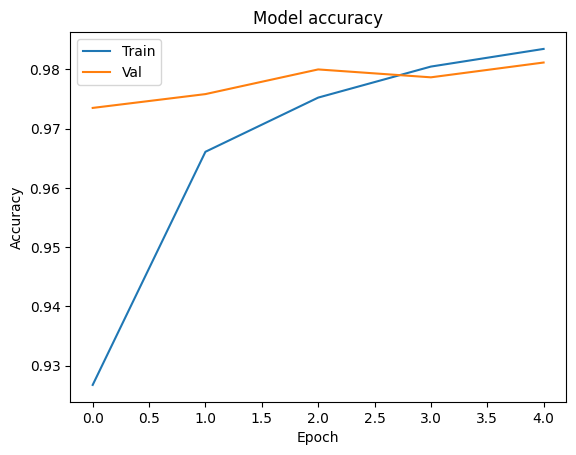

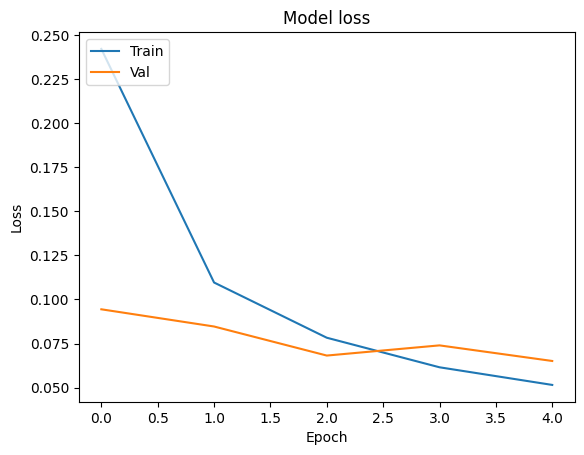

In [4]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


9. How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients?

In [5]:
from tensorflow import keras

optimizer = keras.optimizers.Adam(clipnorm=1.0)

model1 = create_model_with_batchnorm(input_shape, num_classes)


model1.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

history = model1.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8785 - loss: 0.3964 - val_accuracy: 0.9715 - val_loss: 0.0965
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9662 - loss: 0.1114 - val_accuracy: 0.9767 - val_loss: 0.0759
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9766 - loss: 0.0744 - val_accuracy: 0.9823 - val_loss: 0.0641
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9827 - loss: 0.0563 - val_accuracy: 0.9778 - val_loss: 0.0804
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9838 - loss: 0.0488 - val_accuracy: 0.9812 - val_loss: 0.0598


10. How can you create a custom loss function in Keras?

In [6]:
def weighted_mse(y_true, y_pred):
    weights = tf.constant([0.5, 1.0, 0.2])
    squared_errors = tf.square(y_true - y_pred)
    weighted_squared_errors = squared_errors * weights
    return tf.reduce_mean(weighted_squared_errors, axis=-1)

model5 = keras.Sequential(
        [
            keras.Input(shape=(1,)),
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )

model5.compile(optimizer='adam', loss=weighted_mse, metrics=['r2_score'])

import numpy as np
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2*x + 1 + np.random.normal(0, 1, 100)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)

model5.fit(x_train, y_train, batch_size=8, epochs=10, validation_split=0.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 77.4666 - r2_score: -4.1268 - val_loss: 75.1585 - val_r2_score: -1.8451
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 60.5706 - r2_score: -2.5398 - val_loss: 58.7759 - val_r2_score: -1.2250
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 44.6116 - r2_score: -1.1906 - val_loss: 44.1072 - val_r2_score: -0.6697
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31.3199 - r2_score: -0.9783 - val_loss: 30.8424 - val_r2_score: -0.1675
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.7910 - r2_score: -0.1779 - val_loss: 19.7203 - val_r2_score: 0.2535
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.5274 - r2_score: 0.1549 - val_loss: 10.7796 - val_r2_score: 0.5919
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9217 - r2_score: 0.6593 - val_loss: 4.9262 - val_r2_score: 0.8135
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6362 - r2_score: 0.8354 - val_loss: 1.8352 - 

11. How can you visualize the structure of a neural network model in Keras?

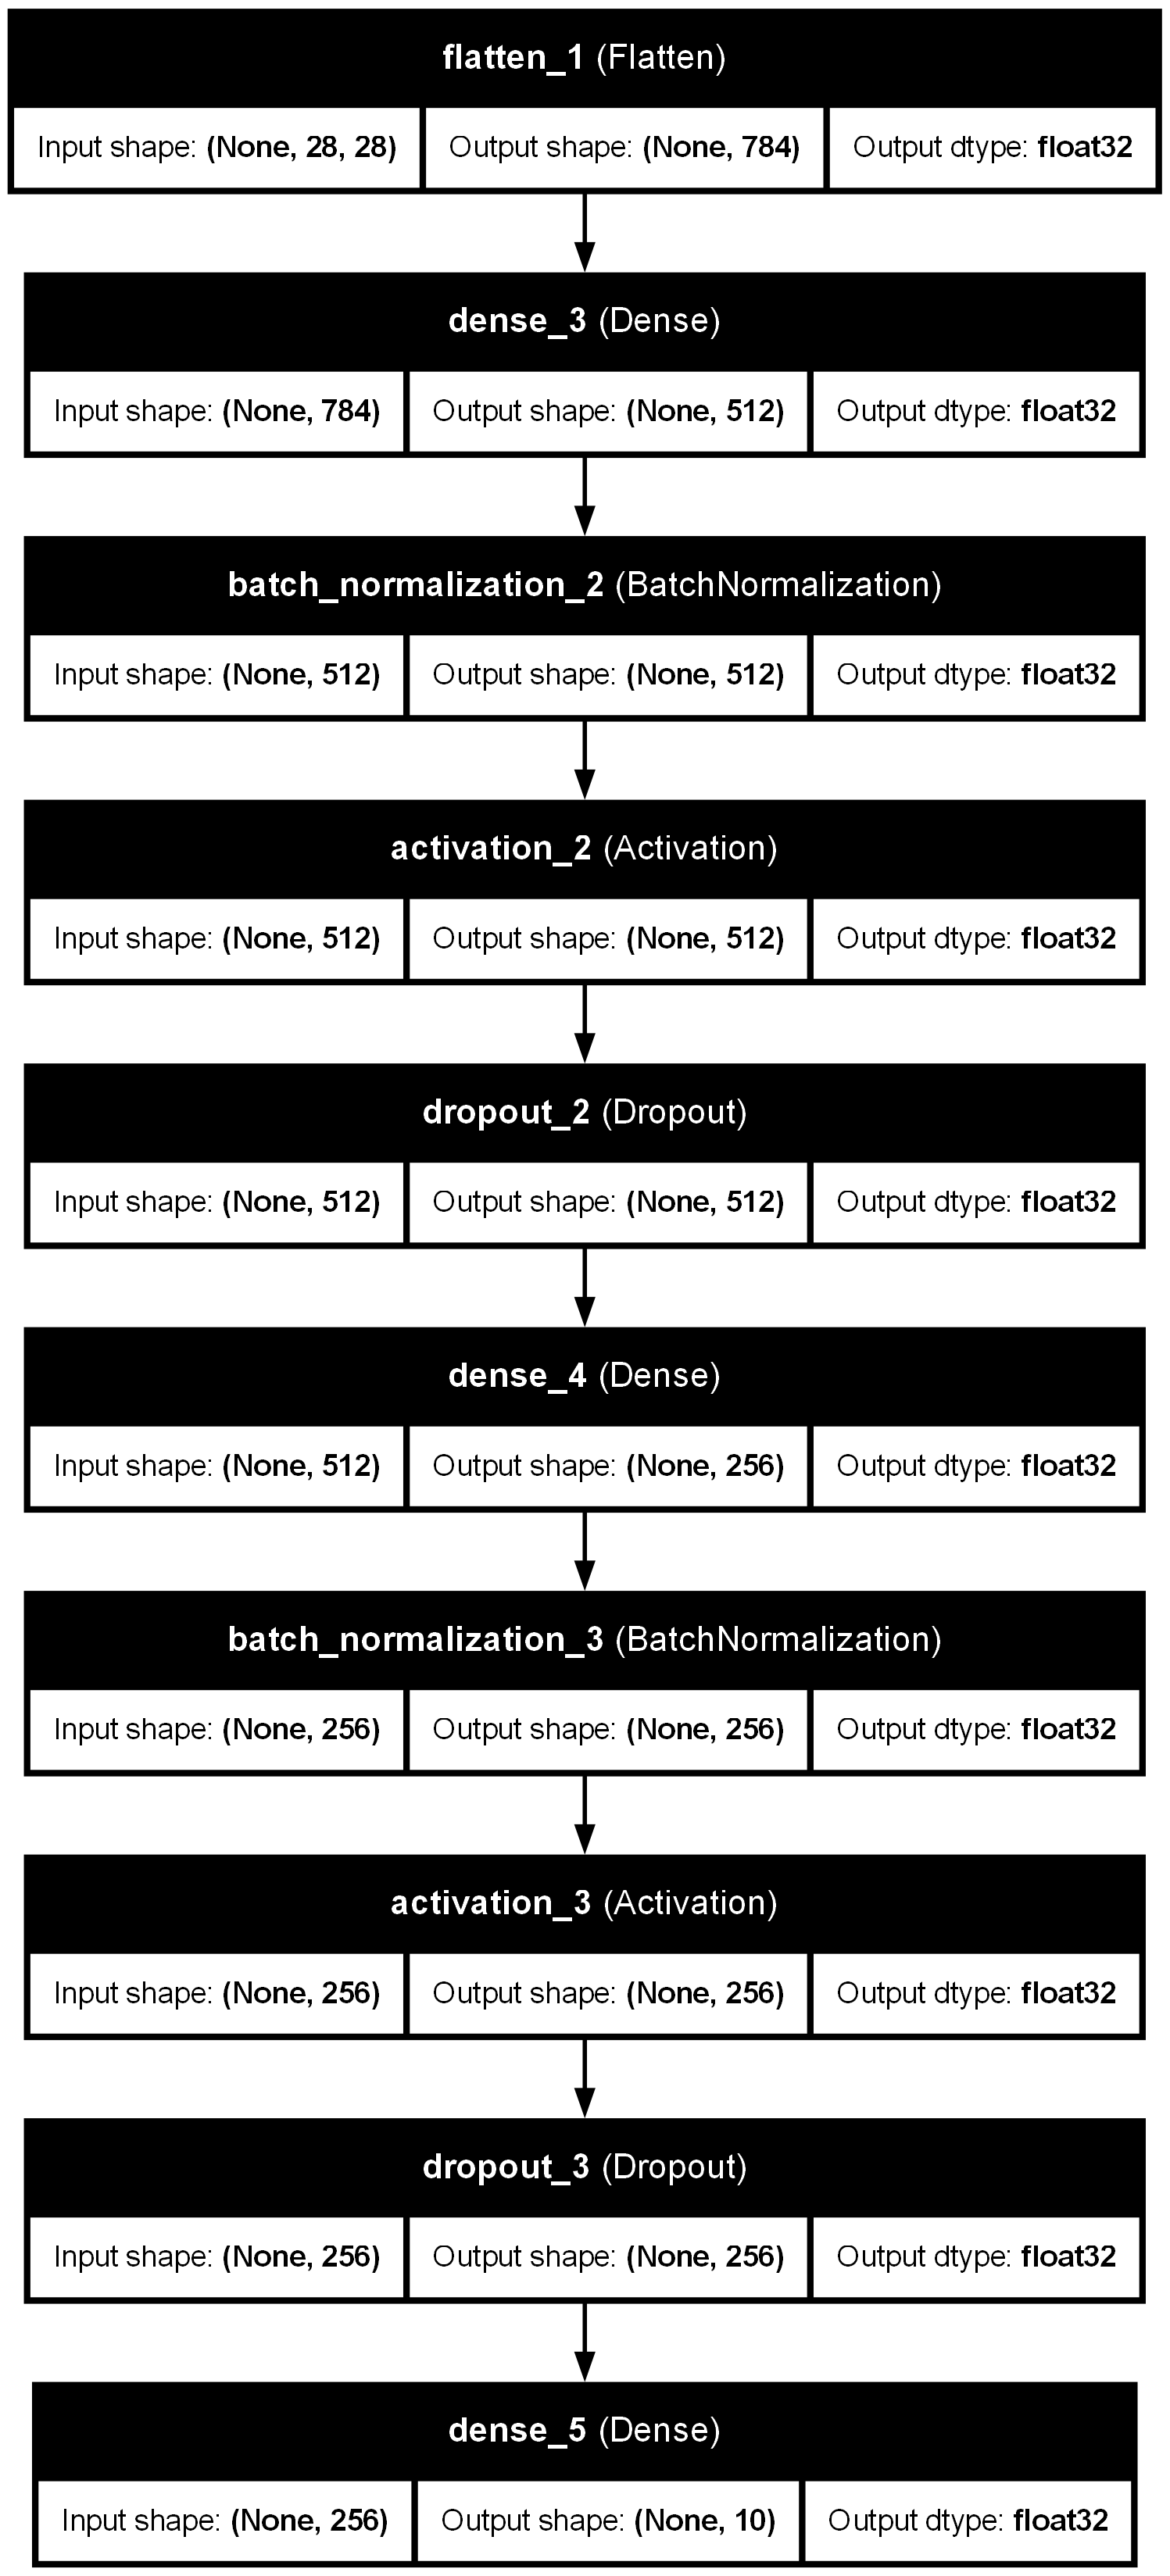

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model1, to_file='model_plot.png', show_shapes=True, show_dtype=True, show_layer_names=True)